<a href="https://colab.research.google.com/github/mdrafeulshougat/SelfDrivingRoadSignClass/blob/main/Traffic_signs_ModifiedleNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

!ls german-traffic-sign

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.
ls: cannot access 'german-traffic-sign': No such file or directory


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.utils.np_utils import to_categorical
from keras.layers.convolutional import Conv2D, MaxPooling2D
import random
import pickle
import pandas as pd
import cv2

from keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [ ]:
%matplotlib inline

np.random.seed(0)

In [ ]:
with open('german-traffic-signs/train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
    val_data = pickle.load(f)
# TODO: Load test data
with open('german-traffic-signs/test.p', 'rb') as f:
    test_data = pickle.load(f)

In [ ]:
# Split out features and labels
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

#already 4 dimensional
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 3)
(12630, 32, 32, 3)
(4410, 32, 32, 3)


In [ ]:
# STOP: Do not change the tests below. Your implementation should pass these tests. 
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels."
assert(X_val.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."

In [ ]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

In [ ]:
data.iterrows()

<generator object DataFrame.iterrows at 0x7f3b9528d950>

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


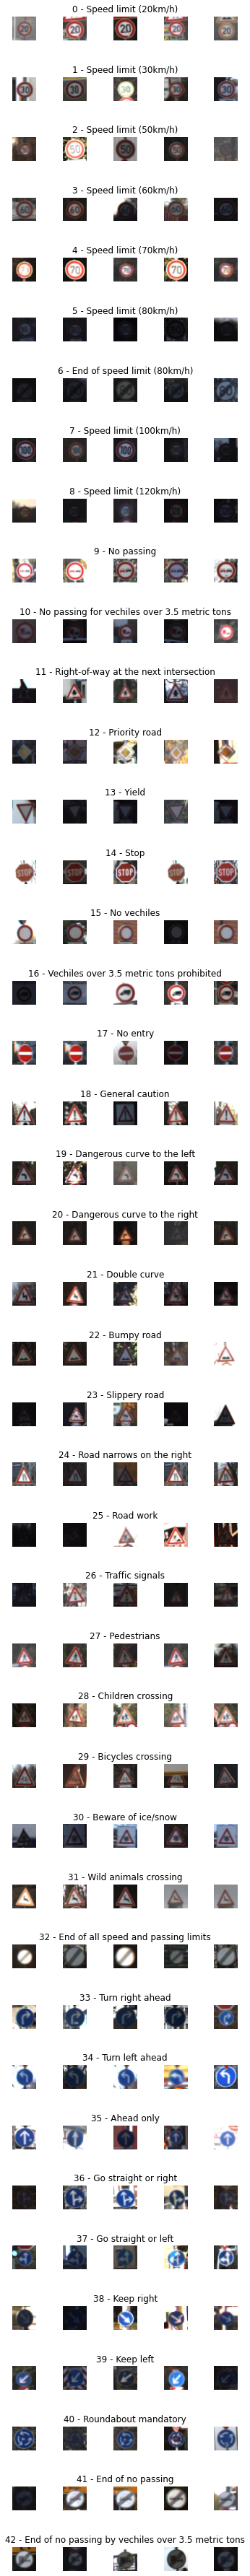

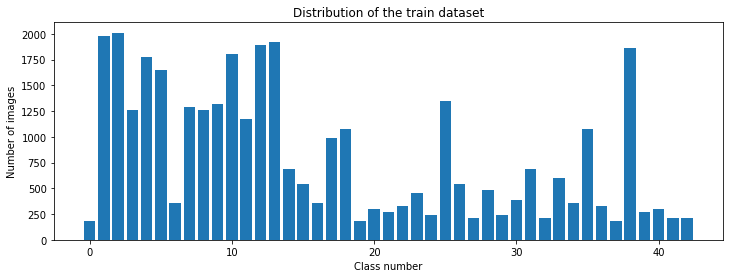

In [ ]:
num_of_samples=[]

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j) + " - " + row["SignName"])
        num_of_samples.append(len(x_selected))

print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

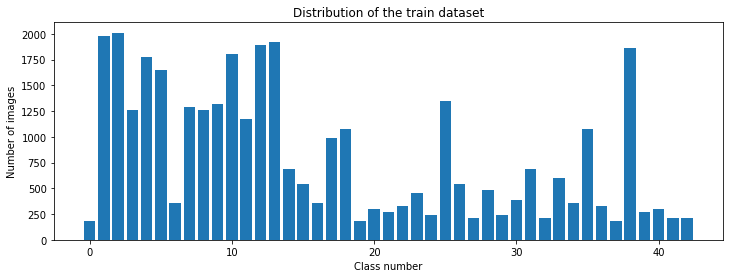

In [ ]:
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
36


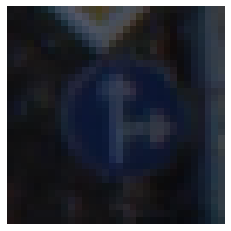

In [ ]:
import cv2

plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

In [ ]:
def grayscale(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img

(32, 32)


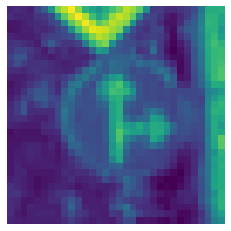

In [ ]:
img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis("off")
print(img.shape)

In [ ]:
def equalize(img):
  img = cv2.equalizeHist(img)
  return img

(32, 32)


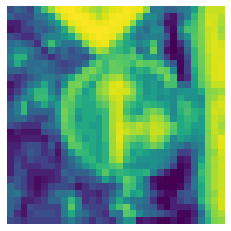

In [ ]:
img = equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)

In [ ]:
def preprocess(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

(34799, 32, 32)


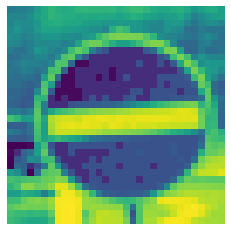

In [ ]:
X_train = np.array(list(map(preprocess, X_train)))
X_test = np.array(list(map(preprocess, X_test)))
X_val = np.array(list(map(preprocess, X_val)))

plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)

In [ ]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)

In [ ]:
print(X_train.shape)

(34799, 32, 32, 1)


In [ ]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

(100, 32, 32, 1)


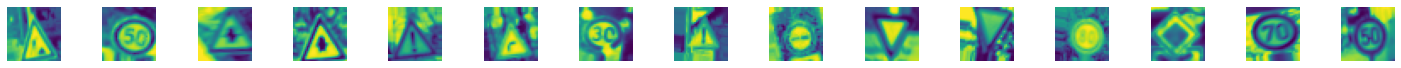

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1,
                                height_shift_range=0.1,
                                zoom_range=0.2,
                                shear_range=0.1,
                                rotation_range=10.)

datagen.fit(X_train)

# for X_batch, y_batch in


batches = datagen.flow(X_train, y_train, batch_size = 100)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32))
    axs[i].axis("off")

print(X_batch.shape)

In [ ]:
def modified_model():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(Conv2D(60, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
      
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
      
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(43, activation='softmax'))
      
  model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

      

model = modified_model()
print(model.summary())

history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=10),
                            steps_per_epoch=len(X_train)//10,
                            epochs=10,
                            validation_data=(X_val, y_val), shuffle = 1)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_76 (Conv2D)          (None, 28, 28, 60)        1560      
                                                                 
 conv2d_77 (Conv2D)          (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 12, 12, 60)       0         
 g2D)                                                            
                                                                 
 conv2d_78 (Conv2D)          (None, 10, 10, 30)        16230     
                                                                 
 conv2d_79 (Conv2D)          (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 4, 4, 30)         0         
 g2D)                                                

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


3479/3479 [==============================] - 28s 8ms/step - loss: 1.2996 - accuracy: 0.6259 - val_loss: 0.2317 - val_accuracy: 0.9299
Epoch 2/10
3479/3479 [==============================] - 26s 8ms/step - loss: 0.3927 - accuracy: 0.8785 - val_loss: 0.0796 - val_accuracy: 0.9764
Epoch 3/10
3479/3479 [==============================] - 26s 8ms/step - loss: 0.2722 - accuracy: 0.9143 - val_loss: 0.0939 - val_accuracy: 0.9789
Epoch 4/10
3479/3479 [==============================] - 29s 8ms/step - loss: 0.2283 - accuracy: 0.9298 - val_loss: 0.0757 - val_accuracy: 0.9837
Epoch 5/10
3479/3479 [==============================] - 26s 8ms/step - loss: 0.1995 - accuracy: 0.9404 - val_loss: 0.1073 - val_accuracy: 0.9664
Epoch 6/10
3479/3479 [==============================] - 27s 8ms/step - loss: 0.1850 - accuracy: 0.9438 - val_loss: 0.0944 - val_accuracy: 0.9710
Epoch 7/10
3479/3479 [==============================] - 27s 8ms/step - loss: 0.1689 - accuracy: 0.9498 - val_loss: 0.0651 - val_accuracy: 0.9

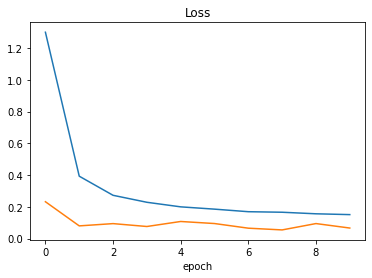

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

# TODO: Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=0)

Text(0.5, 0, 'epoch')

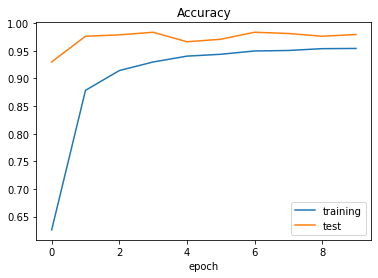

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','test'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [ ]:
print(row)

ClassId                                                    42
SignName    End of no passing by vechiles over 3.5 metric ...
Name: 42, dtype: object


Test score: 0.1939297914505005
Test accuracy: 0.958511471748352
(32, 32)
1/1 [==============================] - 0s 19ms/step
predicted sign: [29]


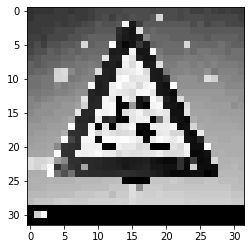

In [ ]:
print('Test score:', score[0])
print('Test accuracy:', score[1])

#predict internet number
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1)
Z=str(np.argmax(model.predict(img), axis=-1))
print("predicted sign: "+ str(np.argmax(model.predict(img), axis=-1)))